In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.describe

<bound method NDFrame.describe of      Age  Gender  Total_Bilirubin  ...  Albumin  Albumin_and_Globulin_Ratio  Dataset
0     65  Female              0.7  ...      3.3                        0.90        1
1     62    Male             10.9  ...      3.2                        0.74        1
2     62    Male              7.3  ...      3.3                        0.89        1
3     58    Male              1.0  ...      3.4                        1.00        1
4     72    Male              3.9  ...      2.4                        0.40        1
..   ...     ...              ...  ...      ...                         ...      ...
578   60    Male              0.5  ...      1.6                        0.37        2
579   40    Male              0.6  ...      3.2                        1.10        1
580   52    Male              0.8  ...      3.2                        1.00        1
581   31    Male              1.3  ...      3.4                        1.00        1
582   38    Male              1

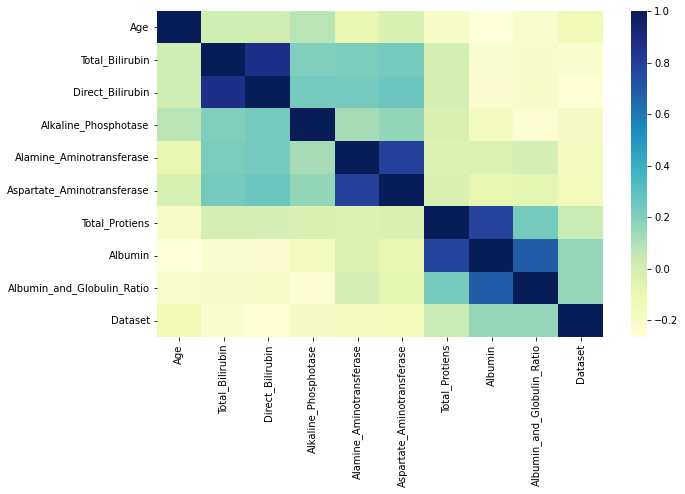

In [ ]:
vis=plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='YlGnBu')

In [ ]:
df1=df[df['Dataset']==1]
df1                                                                          

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1


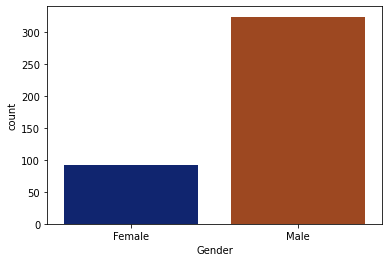

In [ ]:
sns.countplot(x='Gender',data=df1,palette='dark')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


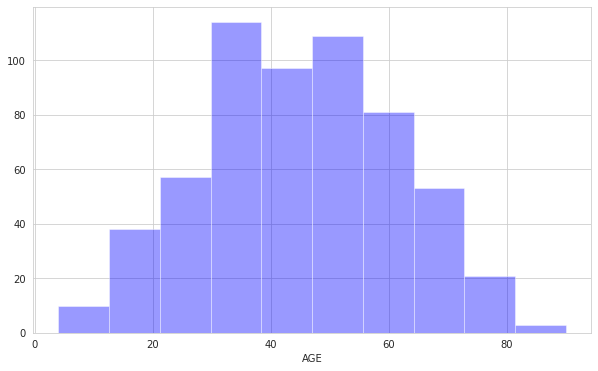

In [ ]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(10,6))
sns.distplot(df['Age'],bins=10,kde=False,axlabel='AGE',color='blue')

In [ ]:
#DATA CLEANING 
for i in range(583):
    if df.iloc[i,10]==2:
        df.iloc[i,10]=0

In [ ]:
df['Dataset'].unique()

array([1, 0])

In [ ]:
for i in range(583):
    if df.iloc[i,1]=='Male':
       df.iloc[i,1]=0
    else:
        df.iloc[i,1]=1

     

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
for i in range(11):
    print(sum(df.iloc[:,i].isnull())) 

0
0
0
0
0
0
0
0
0
4
0


In [ ]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [ ]:
#check for null values after chnaging null values with its mean
sum(df['Albumin_and_Globulin_Ratio'].isnull())

0

In [ ]:
#scale the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Dataset',axis=1))
scaled_features = scaler.transform(df.drop('Dataset',axis=1))
df2_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df2_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,0.0,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,0.0,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,0.0,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,0.0,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,0.0,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


In [ ]:
X=df2_scaled
y=df['Dataset']

In [ ]:
#spliting the data into training and testing models 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,mean_absolute_error,mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
y_test.value_counts()

1    124
0     51
Name: Dataset, dtype: int64

In [ ]:
#Decesion tree
from sklearn.svm import SVC
model=SVC()
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predictions=dt.predict(X_test)
dt_acc=accuracy_score(y_test,dt_predictions)
dt_prec=precision_score(y_test,dt_predictions)
dt_rec=recall_score(y_test,dt_predictions)
dt_f1=f1_score(y_test,dt_predictions)
dt_mas=mean_absolute_error(y_test,dt_predictions)
dt_rms=np.sqrt(mean_squared_error(y_test,dt_predictions))
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.38      0.53      0.44        51
           1       0.77      0.65      0.70       124

    accuracy                           0.61       175
   macro avg       0.57      0.59      0.57       175
weighted avg       0.66      0.61      0.63       175



In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logr_predictions=logr.predict(X_test)
logr_acc=accuracy_score(y_test,logr_predictions)
logr_prec=precision_score(y_test,logr_predictions)
logr_rec=recall_score(y_test,logr_predictions)
logr_f1=f1_score(y_test,logr_predictions)
logr_mas=mean_absolute_error(y_test,logr_predictions)
logr_rms=np.sqrt(mean_squared_error(y_test,logr_predictions))
print(classification_report(y_test,logr_predictions))

              precision    recall  f1-score   support

           0       0.41      0.27      0.33        51
           1       0.74      0.84      0.78       124

    accuracy                           0.67       175
   macro avg       0.57      0.56      0.56       175
weighted avg       0.64      0.67      0.65       175



In [ ]:
#svm
from sklearn.svm import SVC
model=SVC()
param_grid = {'C': [0.1,1, 10,50,100,200,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
# GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
svm_predictions=grid.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
svm_acc=accuracy_score(y_test,svm_predictions)
svm_prec=precision_score(y_test,svm_predictions)
svm_rec=recall_score(y_test,svm_predictions)
svm_f1=f1_score(y_test,svm_predictions)
svm_mas=mean_absolute_error(y_test,svm_predictions)
svm_rms=np.sqrt(mean_squared_error(y_test,svm_predictions))
print(classification_report(y_test,svm_predictions))

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf